# EDA ON ACCIDENT SURVIVAL DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif


In [278]:
df = pd.read_csv('accident.csv')

In [279]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


Encoding YES/NO and MALE/FEMALE to 0 and 1


In [280]:
df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})
df['Helmet_Used'] = df['Helmet_Used'].replace({"Yes":1,"No":0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].replace({"Yes":1,"No":0})


In [281]:
df.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
count,200.00000,199.000000,197.000000,200.000000,200.000000,200.00000
mean,43.42500,0.447236,70.441624,0.555000,0.555000,0.50500
std,14.94191,0.498462,30.125298,0.498213,0.498213,0.50123
min,18.00000,0.000000,20.000000,0.000000,0.000000,0.00000
25%,31.00000,0.000000,43.000000,0.000000,0.000000,0.00000
50%,43.50000,0.000000,71.000000,1.000000,1.000000,1.00000
75%,56.00000,1.000000,95.000000,1.000000,1.000000,1.00000
max,69.00000,1.000000,119.000000,1.000000,1.000000,1.00000


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    float64
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    int64  
 4   Seatbelt_Used    200 non-null    int64  
 5   Survived         200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB


In [283]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

#### Checking for Correlation

In [284]:
corr_matrix = df.corr()

<Axes: >

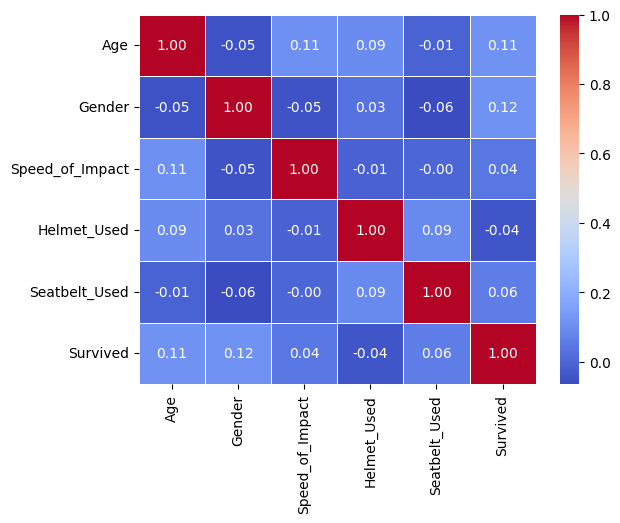

In [285]:
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm',fmt='.2f',linewidths=0.5)

Observation:- 

- There is no significant relation between features

#### Checking For imbalance Dataset

In [286]:
df['Seatbelt_Used'].value_counts()

Seatbelt_Used
1    111
0     89
Name: count, dtype: int64

In [287]:
df['Helmet_Used'].value_counts()

Helmet_Used
1    111
0     89
Name: count, dtype: int64

In [288]:
df['Survived'].value_counts()

Survived
1    101
0     99
Name: count, dtype: int64

In [289]:
df['Gender'].value_counts()

Gender
0.0    110
1.0     89
Name: count, dtype: int64

#### Filling Missing Values

In [290]:
df['Gender'].fillna(df['Gender'].mode()[0] , inplace=True)
df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median() , inplace=True)

#### Visualizing Dataset

<Axes: xlabel='Speed_of_Impact', ylabel='Density'>

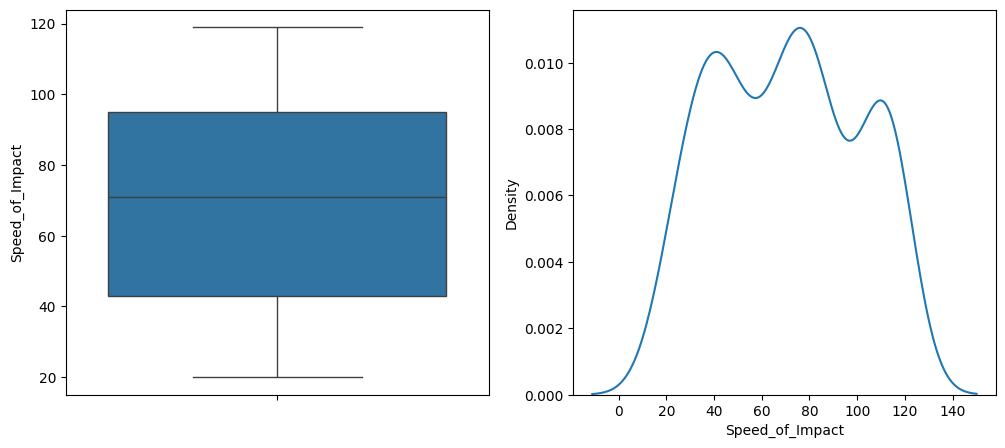

In [291]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Speed_of_Impact'])
plt.subplot(1,2,2)
sns.kdeplot(df['Speed_of_Impact'] )

Observation :-

- From Box Plot we can say no outlier in speed_of_impact feature .
- Distribution is near to Normal 

<Axes: xlabel='Age', ylabel='Density'>

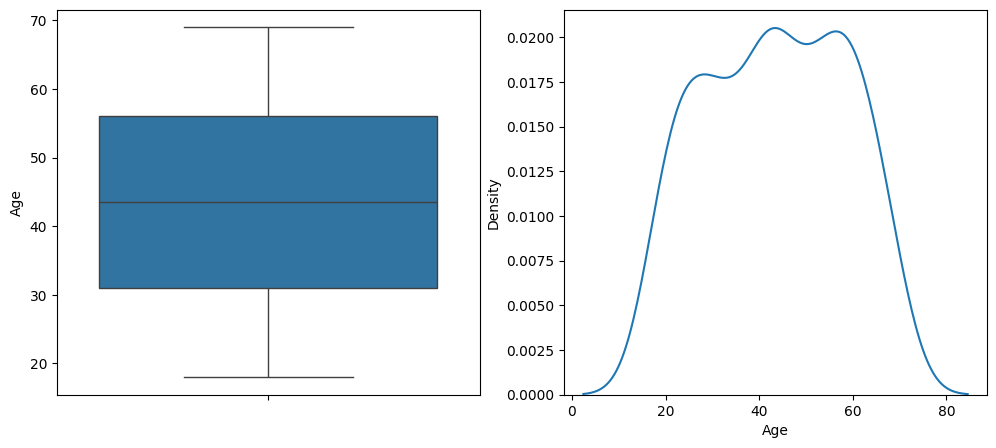

In [292]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.kdeplot(df['Age'] )

Observation:-

- No outlier in Age and Distribution is almost normal

In [293]:
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

Converting Age and Speed of impact to range for better visulaization 

In [326]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 36, 48, 60 ,100], labels=['0-18', '19-36', '37-48', '49-60', '60+'])


<Axes: xlabel='Age_Group', ylabel='count'>

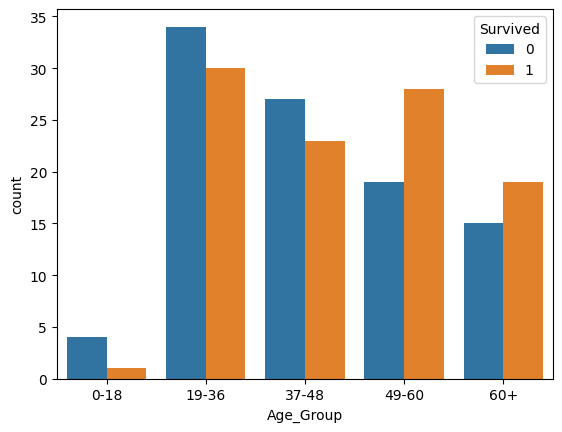

In [327]:
sns.countplot(x = "Age_Group" ,hue="Survived" , data=df)

Observation:-

- We can say that there is high survival rate for Age greater than 48

In [296]:
df['Speed_Range'] = pd.cut(df['Speed_of_Impact'], bins=[0, 20 , 40, 60, 80, 100 , 150], labels=['0-20', '21-40', '41-60', '61-80', '80-100' ,"100+"])


In [297]:
df['Speed_Range'].value_counts()

Speed_Range
100+      47
61-80     45
21-40     37
41-60     37
80-100    30
0-20       4
Name: count, dtype: int64

<Axes: xlabel='Speed_Range', ylabel='count'>

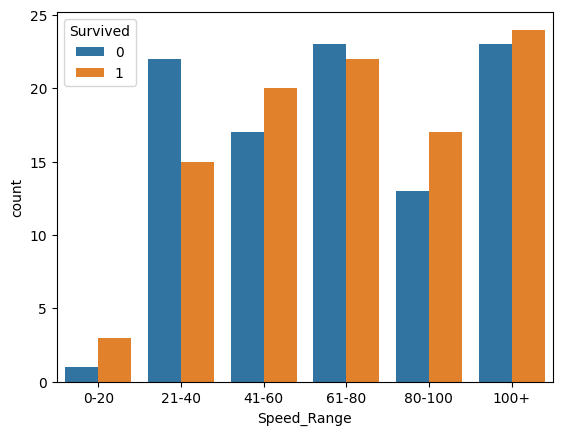

In [298]:
sns.countplot(x="Speed_Range" , hue="Survived" , data=df)

Observation:-

- We can say that majority of accident have taken place in 100+ and 61-80 speed category

/tmp/ipykernel_8578/2241789920.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


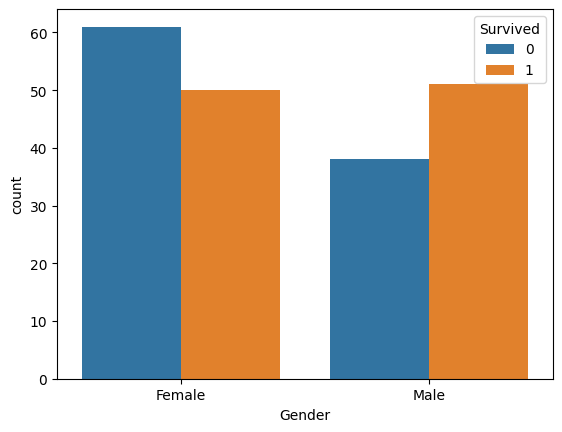

In [299]:
ax =sns.countplot(x="Gender" , hue="Survived" , data=df)
ax.set_xticklabels(['Female', 'Male'])
plt.show()

Observation :-

- We can say that Male has higher survival rate as compare to female

/tmp/ipykernel_8578/3716338672.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


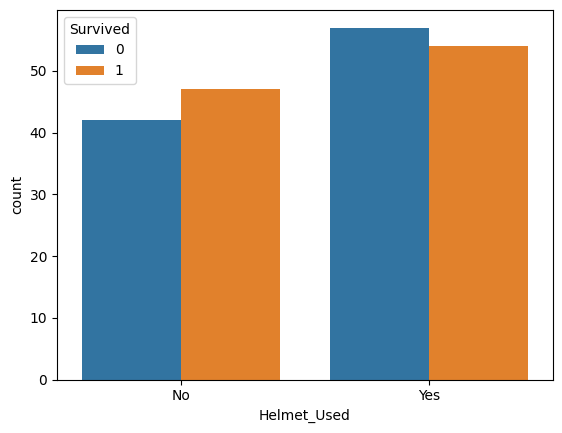

In [300]:
ax =sns.countplot(x="Helmet_Used" , hue="Survived" , data=df)
ax.set_xticklabels(['No', 'Yes'])
plt.show()

Observation:-

- Here it is hard to conclude as person not using have higher number of survivded than person using Helmet.

/tmp/ipykernel_8578/3733095272.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


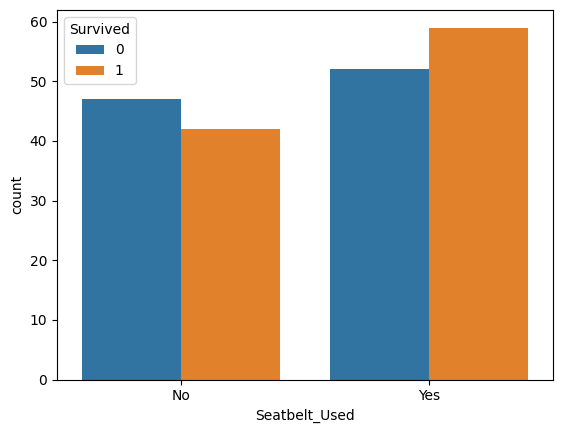

In [301]:
ax =sns.countplot(x="Seatbelt_Used" , hue="Survived" , data=df)
ax.set_xticklabels(['No', 'Yes'])
plt.show()

Observation:-

- Here we can say that person using seatbelt have higher chance of survival 

In [302]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Age_Group,Speed_Range
0,56,0.0,27.0,0,0,1,48-60,21-40
1,69,0.0,46.0,0,1,1,60+,41-60
2,46,1.0,46.0,1,1,0,37-48,41-60
3,32,1.0,117.0,0,1,0,19-36,100+
4,60,0.0,40.0,1,1,0,48-60,21-40


In [303]:
df.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,43.42500,0.445000,70.450000,0.555000,0.555000,0.50500
std,14.94191,0.498213,29.897438,0.498213,0.498213,0.50123
min,18.00000,0.000000,20.000000,0.000000,0.000000,0.00000
25%,31.00000,0.000000,43.000000,0.000000,0.000000,0.00000
50%,43.50000,0.000000,71.000000,1.000000,1.000000,1.00000
75%,56.00000,1.000000,95.000000,1.000000,1.000000,1.00000
max,69.00000,1.000000,119.000000,1.000000,1.000000,1.00000


#### Find relation between survived person age vs non survived person age

In [328]:
survival_with_age = df[df['Survived']==1]['Age']
non_survival_age = df[df['Survived']==0]['Age']

In [329]:
survival_with_age.shape

(101,)

In [330]:
non_survival_age.shape

(99,)

In [331]:
z_stat , p_value = ztest(survival_with_age,non_survival_age ,value =0)
print("Z score " , z_stat , "P value" , p_value )

Z score  1.5585721354497515 P value 0.11909768238192404


In [332]:
if p_value <= 0.05:
    print("There is significant difference between survived person age and non survived age")
else:
    print("There is no diiference between age in survived and non survived person age")

There is no diiference between age in survived and non survived person age


#### Checking assosication between survived and helmet used

In [309]:
contingency_table = pd.crosstab(df['Survived'],df['Helmet_Used'])
chi2_stat , p_value , dof , expected = chi2_contingency(contingency_table)

In [310]:
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 0.19583090002491485
P-Value: 0.6581072801152705
Degrees of Freedom: 1
Expected Frequencies: 
[[44.055 54.945]
 [44.945 56.055]]


In [311]:
# Interpretation
if p_value < 0.05:
    print("There is association between survived and helemt used")
else:
    print("There is no association between survived and helmet used")


There is no association between survived and helmet used


#### checking association between survived and seatbelt used

In [312]:
contingency_table = pd.crosstab(df['Survived'],df['Seatbelt_Used'])
chi2_stat , p_value , dof , expected = chi2_contingency(contingency_table)

In [313]:
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 0.4841480200252034
P-Value: 0.48654941737349866
Degrees of Freedom: 1
Expected Frequencies: 
[[44.055 54.945]
 [44.945 56.055]]


In [314]:
# Interpretation
if p_value < 0.05:
    print("There is association between survived and Seatbelt used")
else:
    print("There is no association between survived and seatbelt used")


There is no association between survived and seatbelt used


#### checking association between survived and Gender

In [315]:
contingency_table = pd.crosstab(df['Survived'],df['Gender'])
chi2_stat , p_value , dof , expected = chi2_contingency(contingency_table)

In [316]:
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 2.499128341824971
P-Value: 0.11390932849509695
Degrees of Freedom: 1
Expected Frequencies: 
[[54.945 44.055]
 [56.055 44.945]]


In [317]:
# Interpretation
if p_value < 0.05:
    print("There is association between survived and Gender ")
else:
    print("There is no association between survived and Gender")


There is no association between survived and Gender


#### Now using feature selection and standard scaling

In [318]:

X = df.drop(columns=['Survived','Age_Group','Speed_Range' ], axis=1)
y = df['Survived']

#### Using info gain for feature selection

In [319]:
info_gain = mutual_info_classif(X, y)

In [320]:
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

print(info_gain_df)

           Feature  Information Gain
1           Gender          0.030447
0              Age          0.000000
2  Speed_of_Impact          0.000000
3      Helmet_Used          0.000000
4    Seatbelt_Used          0.000000


- here four feature have zero values that means that doesnt have impact on survived class
- Gender has value but it is also very small which indicate it has minimal impact on survived class

In [321]:
X_train ,X_test ,  y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=42)

Using Standard scaler

In [322]:
sc = StandardScaler()
num_feature = ['Age' , 'Speed_of_Impact']

In [323]:
X_train[num_feature] = sc.fit_transform(X_train[num_feature])
X_test[num_feature] = sc.transform(X_test[num_feature])

In [324]:
X_train.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
count,1.600000e+02,160.000000,1.600000e+02,160.000000,160.00000
mean,9.436896e-17,0.487500,8.881784e-17,0.562500,0.58750
std,1.003140e+00,0.501413,1.003140e+00,0.497636,0.49383
min,-1.739162e+00,0.000000,-1.701490e+00,0.000000,0.00000
25%,-8.704164e-01,0.000000,-8.881300e-01,0.000000,0.00000
50%,-1.670665e-03,0.000000,2.690019e-02,1.000000,1.00000
75%,8.670750e-01,1.000000,8.402604e-01,1.000000,1.00000
max,1.668994e+00,1.000000,1.653621e+00,1.000000,1.00000


mean value for age and speed of impact are near to zero and std near to 1 that means standard scaler is succesfully applied

In [325]:
X_test.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,-0.200480,0.275000,0.041303,0.525000,0.425000
std,0.975653,0.452203,1.065105,0.505736,0.500641
min,-1.672335,0.000000,-1.701490,0.000000,0.000000
25%,-1.204549,0.000000,-0.964383,0.000000,0.000000
50%,-0.202150,0.000000,0.128570,1.000000,0.000000
75%,0.549649,1.000000,1.238468,1.000000,1.000000
max,1.535341,1.000000,1.653621,1.000000,1.000000


Here same for test dataset it have mean near to zero and std near to one so scaling is successfully applied